## Sequential Model

<br>

            https://www.tensorflow.org/guide/keras/sequential_model?hl=ko
            
- 정확히 1개의 입력 텐서와 1개의 출력 텐서를 갖는 모형.
    - 신경망 내부의 1개 노드로 볼 수 있을듯? 1개당 1개로 연결되는 그런 형태.

In [1]:
# 사용 module load
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

*Dense Layer가 뭘까*  <br>
- https://keras.io/api/layers/core_layers/dense/
- https://www.tutorialspoint.com/keras/keras_dense_layer.htm
    - 첫 인자가 unit의 수. 그러니까 이게 **노드 갯수**라는 소리인거 같은데
        - units: Positive integer, dimensionality of the output space.
        - 출력 노드 수.
    - 아래 예제는 Sequential로 layer를 3개 만듦. 3개의 층이 있는 소리.
        - 첫번째 층은 **2개의 유닛**. 출력이 2개
        - 두번째 층은 **3개의 유닛**. 출력이 3개
        - 세번째 층은 **4개의 유닛**. 출력이 4개.
        
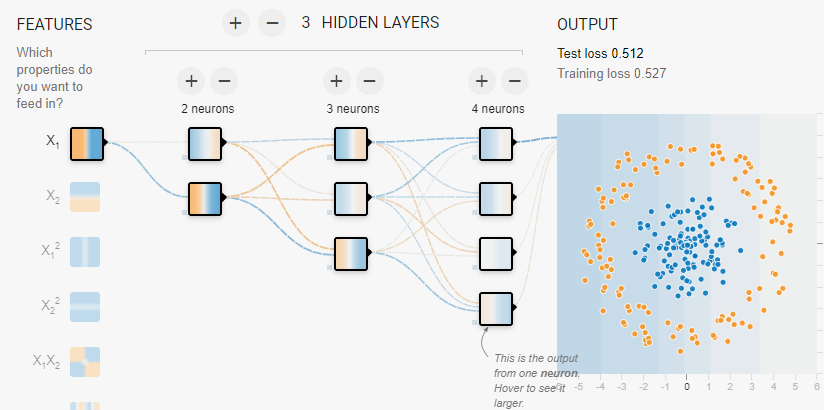

 <center> 그림으로 그려보면 대충 위와 같은 형태가 되는 셈. </center>

In [8]:
# 3개의 층을 가진 모형?
model = keras.Sequential(
    # name 지정을 통해 TensorBoard 그래프에 주석을 달 수 있음. 매우 편리함.
    [
        layers.Dense(2, activation='relu', name='layer1'),
        layers.Dense(3, activation='relu', name='layer2'),
        layers.Dense(4, name='layer3')
    ]
)
x = tf.ones((3,3))
y = model(x)
print(x)
print(y)

tf.Tensor(
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]], shape=(3, 3), dtype=float32)
tf.Tensor(
[[-0.23078494  1.2585407  -0.5586665   0.5298879 ]
 [-0.23078494  1.2585407  -0.5586665   0.5298879 ]
 [-0.23078494  1.2585407  -0.5586665   0.5298879 ]], shape=(3, 4), dtype=float32)


*Sequential 모델은 만능이 아님.*  <br>
- 모델에 다중 입/출력이 있으면 적절하지 않음.
- 층마다 다중입력/다중출력 이 있으면 적절하지 않음.
- 공유하는 층이 있거나, 비선형 토폴로지(?)가 있으면 적절하지 않음.

In [9]:
# 생성한 모델의 레이어는 .layers를 통해 확인해볼 수 있음.
model.layers

In [13]:
# pop을 통해 레이어를 제거할 수도 있음. 제일 마지막 레이어가 빠지는 셈.
model.pop()
print(model.layers)

[<tensorflow.python.keras.layers.core.Dense object at 0x00000187BDAF3710>, <tensorflow.python.keras.layers.core.Dense object at 0x00000187BDB07D68>]


In [14]:
# 레이어 추가는 add()를 통해서도 할 수 있음.
layer1 = layers.Dense(4)
print(layer1.weights) # 미리 입력한 층의 가중치를 볼 수 있음. 아무런 입력이 안왔으니 현재는 빈 상태.
model.add(layer1)
model.layers

[]


In [15]:
# 모델을 한번 돌리고 나면 가중치가 생긴다.
model.weights

[<tf.Variable 'layer1/kernel:0' shape=(3, 2) dtype=float32, numpy=
 array([[-1.0786216 ,  0.7224966 ],
        [ 0.647539  ,  0.2161516 ],
        [ 0.35526025,  0.6873616 ]], dtype=float32)>,
 <tf.Variable 'layer1/bias:0' shape=(2,) dtype=float32, numpy=array([0., 0.], dtype=float32)>,
 <tf.Variable 'layer2/kernel:0' shape=(2, 3) dtype=float32, numpy=
 array([[0.904583  , 0.49549687, 0.03129685],
        [0.20202494, 0.73813367, 1.0279274 ]], dtype=float32)>,
 <tf.Variable 'layer2/bias:0' shape=(3,) dtype=float32, numpy=array([0., 0., 0.], dtype=float32)>,
 <tf.Variable 'dense_1/kernel:0' shape=(3, 4) dtype=float32, numpy=
 array([[-0.7095168 , -0.44634518, -0.09771484, -0.20111066],
        [-0.0919323 ,  0.5316818 ,  0.4072647 , -0.24234575],
        [ 0.24143684, -0.8550967 ,  0.47056174,  0.690297  ]],
       dtype=float32)>,
 <tf.Variable 'dense_1/bias:0' shape=(4,) dtype=float32, numpy=array([0., 0., 0., 0.], dtype=float32)>]

In [16]:
# 한번 빌드하고 나면 (모델을 한번 실행하고 나면) summary() 메서드를 호출할 수 있다.
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Dense)               (3, 2)                    8         
_________________________________________________________________
layer2 (Dense)               (3, 3)                    9         
_________________________________________________________________
dense_1 (Dense)              (3, 4)                    16        
Total params: 33
Trainable params: 33
Non-trainable params: 0
_________________________________________________________________


    입력 특성이 3*3 이었으니 Output Shape의 앞 부분이 3이 되고,
    노드 개수에 따라 Output Shape의 뒷 부분이 바뀌었음.

**현재 출력을 항상 포함해 지금까지의 모델의 summary를 표시할 수 있도록 할 수도 있음.**  <br>
- 이때는 Input 객체를 모델에 전달해 모델의 시작 형태을 알 수 있도록 해야 한다.

In [18]:
model = keras.Sequential()
model.add(keras.Input(shape=(4,))) # 입력 속성은 4개.
model.add(layers.Dense(2, activation='relu', name='layer1')) # 출력 속성은 2개. (노드가 2개)
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Dense)               (None, 2)                 10        
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


저렇게 복잡하게 할 필요 없이, layer 추가 시 input_shape 인자를 전달해 적을 수 있음.

In [19]:
model = keras.Sequential()
model.add(layers.Dense(2, activation='relu', input_shape=(4,),name='layer1'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Dense)               (None, 2)                 10        
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


- 새로운 Sequential을 구축할때는 add()를 통해 layer를 점진적으로 쌓고, 모델 요약을 자주 인쇄하는것이 좋다.
- 다음 예시는 Conv2D와 MaxPooling2D layer를 점진적으로 추가하는 과정.

In [24]:
model = keras.Sequential()
model.add(keras.Input(shape=(250, 250, 3))) # 250*250 크기의 RGB 이미지를 입력으로 받는다.
model.add(layers.Conv2D(32, 5, strides=2, activation='relu')) # 32*5 크기의 합성곱 층 추가
model.add(layers.Conv2D(32, 3, activation='relu')) # 32*3 크기의 합성곱 층 추가
model.add(layers.MaxPooling2D(3)) # MaxPooling 층 추가.
model.summary()

# 앞서 생성한 층들의 뒤로 이어서 층 추가.
model.add(layers.Conv2D(32, 3, activation="relu"))
model.add(layers.Conv2D(32, 3, activation="relu"))
model.add(layers.MaxPooling2D(3))
model.add(layers.Conv2D(32, 3, activation="relu"))
model.add(layers.Conv2D(32, 3, activation="relu"))
model.add(layers.MaxPooling2D(2))
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 123, 123, 32)      2432      
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 121, 121, 32)      9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 40, 40, 32)        0         
Total params: 11,680
Trainable params: 11,680
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 123, 123, 32)      2432      
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 121, 121, 32)      9248      
____________________________

In [25]:
# 앞서 생성한 예시의 마지막 결과가 4*4 특성 맵. 최종 max pooling층을 추가하자.
model.add(layers.GlobalMaxPooling2D())

# 마지막으로 분류 층을 넣어보자.
model.add(layers.Dense(10))

# 그럼 최종 모델의 생김새는 어떨까?
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 123, 123, 32)      2432      
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 121, 121, 32)      9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 40, 40, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 38, 38, 32)        9248      
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 36, 36, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 10, 10, 32)       

**모델이 완성됐으면 이제 뭘 할 수 있을까**  <br>
- 모델을 훈련시키고, 평가해서 추론을 할 수 있음. 
    - https://www.tensorflow.org/guide/keras/train_and_evaluate/?hl=ko
- 모델을 디스크에 저장하고 복구 할 수 있음.
    - https://www.tensorflow.org/guide/keras/save_and_serialize/?hl=ko
- 다중 GPU를 이용해 모델의 훈련속도를 향상시킬 수 있음.